<a href="https://colab.research.google.com/github/kameda-yoshinari/IMISToolExeA2021/blob/main/400/440_DLfS_ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ゼロから作るDeep Learning ch04

In [ ]:
!echo "Change to the JST notation."
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime

Change to the JST notation.


In [ ]:
!echo "Start mounting your Google Drive."
from google.colab import drive 
drive.mount('/content/drive')
!echo "Make a working folder and move to there."
%cd /content/drive/My\ Drive/
%cd 202107_Tool-A/Work400/deep-learning-from-scratch-master
!ls -l

Start mounting your Google Drive.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Make a working folder and move to there.
/content/drive/My Drive
/content/drive/My Drive/202107_Tool-A/Work400/deep-learning-from-scratch-master
total 44
drwx------ 2 root root 4096 Jul 26 00:07 ch01
drwx------ 2 root root 4096 Jul 26 00:07 ch02
drwx------ 2 root root 4096 Jul 26 00:07 ch03
drwx------ 2 root root 4096 Jul 26 00:07 ch04
drwx------ 2 root root 4096 Jul 26 00:07 ch05
drwx------ 2 root root 4096 Jul 26 00:07 ch06
drwx------ 2 root root 4096 Jul 26 00:07 ch07
drwx------ 2 root root 4096 Jul 26 00:07 ch08
drwx------ 2 root root 4096 Jul 26 00:07 common
drwx------ 2 root root 4096 Jul 26 00:07 dataset
-rw------- 1 root root 1078 Jul 26 00:06 LICENSE.md
-rw------- 1 root root 1924 Jul 26 00:06 README.md


In [ ]:
%cd ch04

/content/drive/My Drive/202107_Tool-A/Work400/deep-learning-from-scratch-master/ch04


---
# 4.3.2 gradient_1d.py

In [ ]:
!python gradient_1d.py

0.1999999999990898
<Figure size 640x480 with 1 Axes>


0.1999999999990898


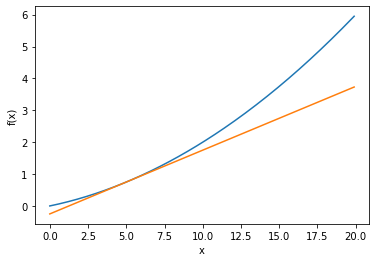

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


# 4.4 gradient_2d.py

In [ ]:
!python gradient_2d.py

<Figure size 640x480 with 1 Axes>


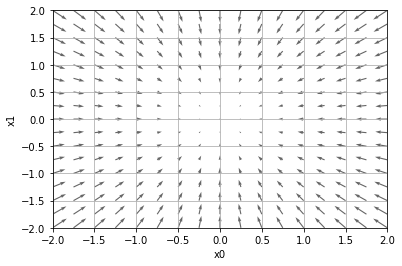

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()


# 4.4.1 gradient_method.py

In [ ]:
!python gradient_method.py

<Figure size 640x480 with 1 Axes>


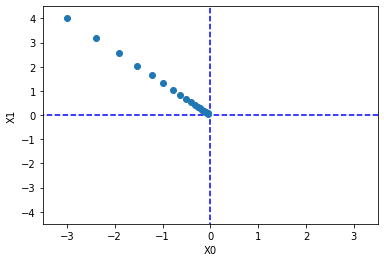

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


# 4.4.2 gradient_simplenet.py

In [ ]:
!python gradient_simplenet.py

[[ 0.12940663  0.12452904 -0.25393567]
 [ 0.19410995  0.18679356 -0.38090351]]


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.22996781  0.23374034 -0.46370815]
 [ 0.34495171  0.3506105  -0.69556222]]


# 4.5.1 two_layer_net.py

In [ ]:
!python two_layer_net.py

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


# 4.5.2 train_neuralnet.py

In [ ]:
!python train_neuralnet.py

train acc, test acc | 0.11296666666666667, 0.114
train acc, test acc | 0.7744, 0.7782
train acc, test acc | 0.8749166666666667, 0.8765
train acc, test acc | 0.8990333333333334, 0.9021
train acc, test acc | 0.9071833333333333, 0.9095
train acc, test acc | 0.91355, 0.9143
train acc, test acc | 0.9189333333333334, 0.9208
train acc, test acc | 0.9227166666666666, 0.9239
train acc, test acc | 0.9269666666666667, 0.9288
train acc, test acc | 0.9301166666666667, 0.9315
train acc, test acc | 0.9335, 0.9346
train acc, test acc | 0.9358, 0.9358
train acc, test acc | 0.9387, 0.9376
train acc, test acc | 0.9410833333333334, 0.9418
train acc, test acc | 0.9431, 0.9428
train acc, test acc | 0.9450833333333334, 0.9452
train acc, test acc | 0.9466833333333333, 0.9452
<Figure size 640x480 with 1 Axes>


train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7807666666666667, 0.7848
train acc, test acc | 0.8770166666666667, 0.88
train acc, test acc | 0.89785, 0.8998
train acc, test acc | 0.9074166666666666, 0.9097
train acc, test acc | 0.9139833333333334, 0.917
train acc, test acc | 0.91955, 0.9205
train acc, test acc | 0.9233166666666667, 0.9245
train acc, test acc | 0.9277333333333333, 0.9283
train acc, test acc | 0.9308166666666666, 0.9317
train acc, test acc | 0.9333333333333333, 0.9347
train acc, test acc | 0.9356666666666666, 0.9365
train acc, test acc | 0.93885, 0.9379
train acc, test acc | 0.9407666666666666, 0.9395
train acc, test acc | 0.9434, 0.9407
train acc, test acc | 0.9446, 0.9432
train acc, test acc | 0.94655, 0.9437


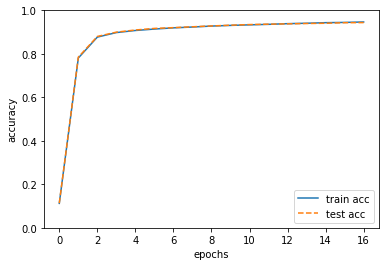

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

---
Tools for intelligent interaction systems a  
Master's and Docotal programs in intelligent and mechanical interaction systems, University of Tsukuba, Japan.  
KAMEDA Yoshinari, SHIBUYA Takeshi  

知能システムツール演習a  
知能機能システム学位プログラム (筑波大学大学院)  
担当：亀田能成，澁谷長史  

2021/07/26.  
